# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

## Introducing New Features

<b>[Task-2]</b> Apply SVM on the below feature set Set 5 by finding the best hyper parameter GridSearch </br>
 
<b>Consider these set of features for Set 5 in Assignment:</b>

<b>categorical data</b>school_state 
clean_categories....clean_subcategories....project_grade_category....teacher_prefix

<b>numerical data</b>
quantity....teacher_number_of_previously_posted_projects....price

<b>New Features</b>

sentiment score's of each of the essay : <b> numerical data</b>   <br>
number of words in the title : <b> numerical data </b>  <br>
number of words in the combine essays : <b> numerical data </b>  <br>

In [12]:
new_title = []
for i in tqdm(project_data['project_title']):
    j = decontracted(i)
    new_title.append(j)   
    

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 77969.35it/s]


In [13]:
#Introducing New Features
title_word_count = []
#for i in project_data['project_title']:
for i in tqdm(new_title):
    j = len(i.split())
    title_word_count.append(j)
    #print(j)
project_data['title_word_count'] = title_word_count


100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 624386.74it/s]


In [14]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  
0  My students are English learners that are work...                 7  
1  Our students arrive to our school eager to lea...                 5

In [15]:
new_essay = []
for i in tqdm(project_data['essay']):
    j = decontracted(i)
    new_essay.append(j)  

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 42573.38it/s]


In [16]:
essay_word_count = []
for i in tqdm(new_essay):
    j = len(i.split())
    essay_word_count.append(j)
    #print(j)
project_data['essay_word_count'] = essay_word_count


100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 43017.48it/s]


In [19]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

   essay_word_count  
0               275  
1               221

### __Computing Sentiment Scores__

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.109, neu: 0.693, pos: 0.198, compound: 0.2023, 

In [21]:
SID = SentimentIntensityAnalyzer()
#There is NEGITIVE and POSITIVE and NEUTRAL and COMPUND SCORES
#http://www.nltk.org/howto/sentiment.html
    
negitive = []
positive = []
neutral = []
compound = []
for i in tqdm(project_data['essay']):
    j = SID.polarity_scores(i)['neg']
    k = SID.polarity_scores(i)['neu']
    l = SID.polarity_scores(i)['pos']
    m = SID.polarity_scores(i)['compound']
    negitive.append(j)
    positive.append(k)
    neutral.append(l)
    compound.append(m)


100%|██████████████████████████████████████████████████████████████████████████| 109248/109248 [28:59<00:00, 62.81it/s]


In [23]:
project_data['negitive'] = negitive
project_data['positive'] = positive
project_data['neutral'] = neutral
project_data['compound'] = compound

In [24]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ... project_is_approved  \
0  \"The limits of your language are the limits o...  ...                   0   
1  The projector we need for our school is very c...  ...                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

  essay_word_count negitive positive  neutral  compound  
0              275    0.008    0.911    0.081    0.9611  
1              221    0.037    0.851    0.112    0.9267  

[2 rows x 24 columns]

## 1.4 Train_Test_Split

In [25]:
#Train Test Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(project_data, project_data["project_is_approved"],
                                                    test_size = 0.33, stratify = project_data["project_is_approved"],
                                                    random_state = 42)

In [26]:
#Train CV Split
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.33, stratify = y_train,
                                                random_state = 42)

In [27]:
print(x_test.columns)
print(x_train.columns)
#print(x_cv.columns)
#print(x_train.shape)
#print(x_test.shape)
#print(x_cv.shape)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'pos

In [28]:
#Dropping Class Label in train test and cv data
x_train.drop(["project_is_approved"], axis = 1, inplace = True)
x_test.drop(["project_is_approved"], axis = 1, inplace = True)
x_cv.drop(["project_is_approved"], axis = 1, inplace = True)

In [29]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'title_word_count', 'essay_word_count',
       'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')


### Preparing Data for Models

In [30]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [31]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [32]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [33]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [34]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Project_Essays preprocessing

In [35]:
#train_preprocessed_essays 
# Combining all the above stundents 
from tqdm import tqdm
train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    train_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:37<00:00, 1290.91it/s]


In [36]:
train_preprocessed_essays[10]

'keeping visual arts classrooms passion i want share classroom in room add means appliance door decor providing quality supplies foster appreciation desire pursue art career i work title one school suburban neighborhood we provide many magnet programs including pbi positive behavior intervention preschool el err i worked many students potential become artists i would like provide experiences quality materials uniform colors brushes not shed bristles chance paint real canvas i hardly wait share opportunity paint room 30 students not opportunity mix colors create real canvas we start outdoor landscapes sky water reflection silhouetted trees begin three colors red white black mix need provide contrast highlights 3 colors we cover vocabulary words tints shades hue line shape foreground mid ground background practice plain construction paper create final product canvas we begin implementation performance based art report card next year to provide instruction color mixing techniques students

In [37]:
# test_preprocessed_essay
from tqdm import tqdm
test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    test_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:28<00:00, 1248.37it/s]


In [38]:
test_preprocessed_essays[10]

'hey i astronaut look says one kindergarten students no look i engineer says another another 5 year old shouts i love technology want computer person i grow this life eyes 5 6 year old public school boys girls they love learning exploring pretending want grow the children come variety ethnic social cultural economic backgrounds but children one thing common love learning especially math science our motto grown anything want learning anything possible just witnessing desire learn math science rewarding my students curious world need know technology help identify real world become scientist math teacher engineer my students love hands activities motivated technology they love learning new things enthusiasm radiates class this ipad case make huge difference way students learning math science it let customize learning according students levels level level level it allow children opportunity understand real world live the children use free science app brain pop jr see scientist work lab ast

In [39]:
# CV_preprocessed_essays
from tqdm import tqdm
cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:19<00:00, 1263.05it/s]


In [40]:
cv_preprocessed_essays[10]

'when asked music means student told music makes feel happy it changed i not anything express feelings i this hope every student joins class my biggest challenge providing everything need learn i blessed able work wonderful students they hunger music insatiable each day i able go work inspired dedication hard work students put everything our school made mission build culture embraces musical learning give every student opportunity participate music our school low income area best provide much needed supplies possible music program keeps growing struggling keep there nothing worse hearing violins played tune it difficult beginning violin students tune strings not always hear differences sound this means teacher often ends tuning instruments taking valuable learning time if students pitch pipes would able play individual notes match violin strings sounds this means could also fix violins get tune practicing home resulting better practice improvement individual playing nannan'

### Project_Titles_preprocessing

In [41]:
# train_preprocessed_title
from tqdm import tqdm
train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    train_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 27363.97it/s]


In [42]:
train_preprocessed_titles[10]

'we all have rembrandt inside us'

In [43]:
# Test_preprocessed_essays
from tqdm import tqdm
test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    test_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 26339.00it/s]


In [44]:
test_preprocessed_titles[10]

'ipads ipads exploring'

In [45]:
# CV_preprocessed_titles
from tqdm import tqdm
cv_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    cv_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 25368.77it/s]


In [46]:
# after preprocesing
cv_preprocessed_titles[10]

'help us play our violins in tune'

In [47]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [48]:
# we use count vectorizer to convert the values into one 
# Vectorizing Clean Categories 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer.fit(x_train['clean_categories'].values)
train_categories_one_hot = vectorizer.fit_transform(x_train['clean_categories'].values)
test_categories_one_hot = vectorizer.transform(x_test['clean_categories'].values)
cv_categories_one_hot = vectorizer.transform(x_cv['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of  Train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of  Test matrix after one hot encodig ",test_categories_one_hot.shape)
print("Shape of  cv  matrix after one hot encodig ",cv_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of  Train matrix after one hot encodig  (49041, 9)
Shape of  Test matrix after one hot encodig  (36052, 9)
Shape of  cv  matrix after one hot encodig  (24155, 9)


In [49]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train["clean_subcategories"].values)
train_sub_categories_one_hot = vectorizer.fit_transform(x_train['clean_subcategories'].values)
test_sub_categories_one_hot = vectorizer.transform(x_test['clean_subcategories'].values)
cv_sub_categories_one_hot = vectorizer.transform(x_cv['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of Train matrix after  Trainone hot encodig ",train_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_sub_categories_one_hot.shape)
print("Shape of cv_ matrix after  one hot encodig ",cv_sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of Train matrix after  Trainone hot encodig  (49041, 30)
Shape of test matrix after one hot encodig  (36052, 30)
Shape of cv_ matrix after  one hot encodig  (24155, 30)


In [50]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
from collections import Counter
my_counter = Counter()
for word in project_data["school_state"].values:
    my_counter.update(word.split())

In [51]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_cat_dict = dict(my_counter)
storted_state_cat_dict = dict(sorted(state_cat_dict.items(), key=lambda kv: kv[1]))

In [53]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
#Using Count Vectorizer to convert the state value onto on hot encoded feature
vectorizer = CountVectorizer(vocabulary=list(storted_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


train_state_one_hot = vectorizer.fit_transform(x_train['school_state'].values)
test_state_one_hot = vectorizer.transform(x_test['school_state'].values)
cv_state_one_hot = vectorizer.transform(x_cv['school_state'].values)

print("Shape of Train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_state_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of Train matrix after one hot encodig  (49041, 51)
Shape of Test matrix after one hot encodig  (36052, 51)
Shape of CV matrix after one hot encodig  (24155, 51)


In [54]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['project_grade_category']=project_data['project_grade_category'].fillna("")
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

In [55]:
project_cat_dict = dict(my_counter)
sorted_project_cat_dict = dict(sorted(project_cat_dict.items(), key=lambda kv: kv[1]))

In [56]:
# feature encoding for project_grade_category also
vectorizer = CountVectorizer(vocabulary=list(sorted_project_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

train_grade_one_hot = vectorizer.fit_transform(x_train['project_grade_category'].values)
test_grade_one_hot = vectorizer.transform(x_test['project_grade_category'].values)
cv_grade_one_hot = vectorizer.transform(x_cv['project_grade_category'].values)

print("Shape of Train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_grade_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_grade_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of Train matrix after one hot encodig  (49041, 5)
Shape of test matrix after one hot encodig  (36052, 5)
Shape of cv matrix after one hot encodig  (24155, 5)


In [57]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(" ")

In [58]:
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

In [59]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_cat_dict = dict(my_counter)
sorted_teacher_cat_dict = dict(sorted(teacher_cat_dict.items(), key=lambda kv: kv[1]))

In [60]:
#Using Count Vectorizer to convert the teacher_prefix value onto on hot encoded feature
#ValueError: np.nan is an invalid document, expected byte or unicode string.
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())

train_teacher_one_hot = vectorizer.fit_transform(x_train['teacher_prefix'].values.astype('U'))
test_teacher_one_hot = vectorizer.transform(x_test['teacher_prefix'].values.astype('U'))
cv_teacher_one_hot = vectorizer.transform(x_cv['teacher_prefix'].values.astype('U'))

print("Shape of Train matrix after one hot encodig ",train_teacher_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_teacher_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_teacher_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of Train matrix after one hot encodig  (49041, 5)
Shape of Test matrix after one hot encodig  (36052, 5)
Shape of CV matrix after one hot encodig  (24155, 5)


### 1.5.2 Vectorizing Text data

### 1.5.2.1 Bag of words

<b>Minimum frequency of words 10 (min_df = 10) of ALL features  </b>

In [61]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

train_text_bow = vectorizer.fit_transform(train_preprocessed_essays)
print("Shape of matrix after one hot encodig ",train_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 12132)


In [62]:
#Vectorizing Test Data
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
test_text_bow = vectorizer.transform(test_preprocessed_essays)
print("Shape of matrix after one hot encodig ",test_text_bow.shape)

Shape of matrix after one hot encodig  (36052, 12132)


In [63]:
# Vectrozing CV Data 
cv_text_bow = vectorizer.transform(cv_preprocessed_essays)
print("Shape of matrix after one hot encodig ",cv_text_bow.shape)

Shape of matrix after one hot encodig  (24155, 12132)


### Project_Title BOW 

In [64]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_titles)

train_titles_bow = vectorizer.fit_transform(train_preprocessed_titles)
print("Shape of matrix after one hot encodig ",train_titles_bow.shape)

Shape of matrix after one hot encodig  (49041, 2080)


In [65]:
#Vectorizing Test Data
test_titles_bow = vectorizer.transform(test_preprocessed_titles)
print("Shape of matrix after one hot encodig ",test_titles_bow.shape)

Shape of matrix after one hot encodig  (36052, 2080)


In [66]:
#Vectrizing CV Data
cv_titles_bow = vectorizer.transform(cv_preprocessed_titles)
print("Shape of matrix after one hot encodig ",cv_titles_bow.shape)

Shape of matrix after one hot encodig  (24155, 2080)


### 1.5.2.2 TFIDF vectorizer

<b>Here also we are considering word frequency of 10 words(min_df = 10) of all features </b>

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

train_text_tfidf = vectorizer.fit_transform(train_preprocessed_essays)
print("Shape of matrix after one hot encodig ",train_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 12132)


In [68]:
test_text_tfidf = vectorizer.transform(test_preprocessed_essays)
print("Shape of matrix after one hot encodig ",test_text_tfidf.shape)

Shape of matrix after one hot encodig  (36052, 12132)


In [69]:
cv_text_tfidf = vectorizer.transform(cv_preprocessed_essays)
print("Shape of matrix after one hot encodig ",cv_text_tfidf.shape)

Shape of matrix after one hot encodig  (24155, 12132)


#### Project Titles

In [70]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_titles)

train_title_tfidf = vectorizer.fit_transform(train_preprocessed_titles)
print("Shape of matrix after one hot encodig ",train_title_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 2080)


In [71]:
test_title_tfidf = vectorizer.transform(test_preprocessed_titles)
print("Shape of matrix after one hot encodig ",test_title_tfidf.shape)

Shape of matrix after one hot encodig  (36052, 2080)


In [72]:
cv_title_tfidf = vectorizer.transform(cv_preprocessed_titles)
print("Shape of matrix after one hot encodig ",cv_title_tfidf.shape)

Shape of matrix after one hot encodig  (24155, 2080)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [73]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [74]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:24<00:00, 2036.76it/s]


49041
300


In [76]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:17<00:00, 2092.85it/s]


36052
300


In [77]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:10<00:00, 2243.89it/s]


24155
300


### AVG_W2V Project_Titles

In [78]:
# average Word2Vec
# compute average word2vec for each review.
train_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_title_avg_w2v_vectors.append(vector)

print(len(train_title_avg_w2v_vectors))
print(len(train_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 40648.16it/s]


49041
300


In [79]:
# average Word2Vec
# compute average word2vec for each review.
test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_title_avg_w2v_vectors.append(vector)

print(len(test_title_avg_w2v_vectors))
print(len(test_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 40585.26it/s]


36052
300


In [80]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_title_avg_w2v_vectors.append(vector)

print(len(cv_title_avg_w2v_vectors))
print(len(cv_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 41546.15it/s]


24155
300


### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [81]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [152]:
# average Word2Vec
# compute average word2vec for each review.
train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_essay_tfidf_w2v_vectors.append(vector)

print(len(train_essay_tfidf_w2v_vectors))
print(len(train_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [02:28<00:00, 330.11it/s]


49041
300


In [82]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_essay_tfidf_w2v_vectors.append(vector)

print(len(test_essay_tfidf_w2v_vectors))
print(len(test_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:55<00:00, 312.38it/s]


36052
300


In [83]:
# average Word2Vec
# compute average word2vec for each review.
cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_essay_tfidf_w2v_vectors.append(vector)

print(len(cv_essay_tfidf_w2v_vectors))
print(len(cv_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:17<00:00, 310.75it/s]


24155
300


### Proect_titles

In [84]:
# average Word2Vec
# compute average word2vec for each review.
train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

print(len(train_title_tfidf_w2v_vectors))
print(len(train_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 18688.31it/s]


49041
300


In [85]:
# average Word2Vec
# compute average word2vec for each review.
test_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 19155.27it/s]


36052
300


In [86]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_title_tfidf_w2v_vectors.append(vector)

print(len(cv_title_tfidf_w2v_vectors))
print(len(cv_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 18548.29it/s]


24155
300


### 1.5.3 Vectorizing Numerical features

In [87]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(price_data.head())
#print(project_data.columns)
print(x_train.columns)

        id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'title_word_count', 'essay_word_count',
       'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')


In [88]:
#   - quantity : numerical (optinal)
#   - teacher_number_of_previously_posted_projects : numerical
#   - price : numerical
x_train = pd.merge(x_train, price_data, on = "id", how = "left")
#print(x_train.columns)
x_test = pd.merge(x_test, price_data, on = "id", how = "left")
x_cv = pd.merge(x_cv, price_data, on = "id", how = "left")

### Standardize Price

In [89]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()

price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_price_standar = price_scalar.transform(x_train['price'].values.reshape(-1, 1))

price_scalar.fit(x_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(x_test['price'].values.reshape(-1, 1))

price_scalar.fit(x_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_price_standar = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))

TRAIN -> Mean : 297.1335653840664, Standard deviation : 363.28872800136634
TEST -> Mean : 300.7768501054033, Standard deviation : 382.6699753150988
CV -> Mean : 296.1543266404471, Standard deviation : 352.5491742990371


In [90]:
print(train_price_standar.shape, y_train.shape)
print(test_price_standar.shape, y_test.shape)
print(cv_price_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standardize Teacher previously posted Projects

In [91]:
warnings.filterwarnings("ignore")
price_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_prev_proj_standar = price_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_scalar.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_prev_proj_standar = price_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_scalar.fit(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_prev_proj_standar = price_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

TRAIN -> Mean : 11.093656328378296, Standard deviation : 27.627970646902444
TEST -> Mean : 11.299123488294686, Standard deviation : 28.185609983236137
CV -> Mean : 11.056137445663424, Standard deviation : 27.46187050275317


In [92]:
print(train_prev_proj_standar.shape, y_train.shape)
print(test_prev_proj_standar.shape, y_test.shape)
print(cv_prev_proj_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standardize Quantity

In [93]:
price_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_quantity_standar = price_scalar.transform(x_train['quantity'].values.reshape(-1, 1))

price_scalar.fit(x_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_quantity_standar = price_scalar.transform(x_test['quantity'].values.reshape(-1, 1))

price_scalar.fit(x_cv['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_quantity_standar = price_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))

TRAIN -> Mean : 17.10701249974511, Standard deviation : 27.48278828673773
TEST -> Mean : 16.771219349828026, Standard deviation : 24.416340622026798
CV -> Mean : 16.968660732767542, Standard deviation : 26.023272927346344


In [94]:
print(train_quantity_standar.shape, y_train.shape)
print(test_quantity_standar.shape, y_test.shape)
print(cv_quantity_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standardize Title_word_count

In [95]:
title_scalar = StandardScaler()
title_scalar.fit(x_train['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
train_title_word_count_standar = title_scalar.transform(x_train['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(x_test['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
test_title_word_count_standar = title_scalar.transform(x_test['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(x_cv['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
cv_title_word_count_standar = title_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))

print(train_title_word_count_standar.shape, y_train.shape)
print(test_title_word_count_standar.shape, y_test.shape)
print(cv_title_word_count_standar.shape, y_cv.shape)

Mean : 5.203258497991476, Standard deviation : 26.023272927346344
Mean : 5.199628314656607, Standard deviation : 26.023272927346344
Mean : 5.200455392258331, Standard deviation : 26.023272927346344
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standardize Essay_word_count

In [96]:
essay_scalar = StandardScaler()

essay_scalar.fit(x_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_essay_word_count_standar = essay_scalar.transform(x_train['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(x_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_essay_word_count_standar = essay_scalar.transform(x_test['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_essay_word_count_standar = essay_scalar.transform(x_cv['essay_word_count'].values.reshape(-1, 1))

print(train_essay_word_count_standar.shape, y_train.shape)
print(test_essay_word_count_standar.shape, y_test.shape)
print(cv_essay_word_count_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standardize Positive Intensity

In [97]:

essay_scalar.fit(x_train['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_positive_standar = essay_scalar.transform(x_train['positive'].values.reshape(-1, 1))

essay_scalar.fit(x_train['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_positive_standar = essay_scalar.transform(x_test['positive'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_positive_standar = essay_scalar.transform(x_cv['positive'].values.reshape(-1, 1))

print(train_positive_standar.shape, y_train.shape)
print(test_positive_standar.shape, y_test.shape)
print(cv_positive_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standarsize Negitive Intensity

In [98]:

essay_scalar.fit(x_train['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_negitive_standar = essay_scalar.transform(x_train['negitive'].values.reshape(-1, 1))

essay_scalar.fit(x_train['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_negitive_standar = essay_scalar.transform(x_test['negitive'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_negitive_standar = essay_scalar.transform(x_cv['negitive'].values.reshape(-1, 1))

print(train_negitive_standar.shape, y_train.shape)
print(test_negitive_standar.shape, y_test.shape)
print(cv_negitive_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### Standardize Neutral Intensity

In [99]:

essay_scalar.fit(x_train['neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_neutral_standar = essay_scalar.transform(x_train['neutral'].values.reshape(-1, 1))

essay_scalar.fit(x_train['neutral'].values.reshape(-1,1))
test_neutral_standar = essay_scalar.transform(x_test['neutral'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_neutral_standar = essay_scalar.transform(x_cv['neutral'].values.reshape(-1, 1))

print(train_neutral_standar.shape, y_train.shape)
print(test_neutral_standar.shape, y_test.shape)
print(cv_neutral_standar.shape, y_cv.shape)

(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


# Assignment 5: Support Vector Machines

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Support Vector Machine 

## 2.1 SVM On Set-1

### Merging all Categorical and Numerical  _ SET-1 BOW Encoding

In [100]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot,train_text_bow, train_titles_bow, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))


(49041, 14320) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [101]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot,test_text_bow, test_titles_bow, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_essay_word_count_standar, 
                  test_title_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1))

(36052, 14320) (36052,)
<class 'scipy.sparse.csr.csr_matrix'>


In [102]:
X_cv1 = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_state_one_hot, cv_grade_one_hot,
                  cv_teacher_one_hot, cv_text_bow, cv_titles_bow, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_essay_word_count_standar, 
                  cv_title_word_count_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1))

(24155, 14320) (24155,)
<class 'scipy.sparse.csr.csr_matrix'>


In [103]:
print(X_train1.shape, y_train.shape)

(49041, 14320) (49041,)


### Hyperparameter Tunning

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import *
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm

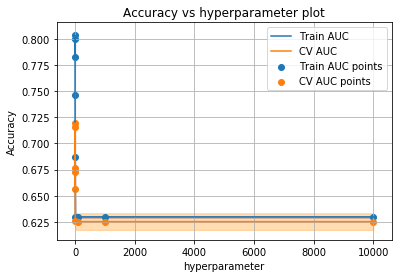

In [105]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### Here we can't able to find the best Hyperparamter Now i am reducing the range of 'ALPHA' for rest of my models

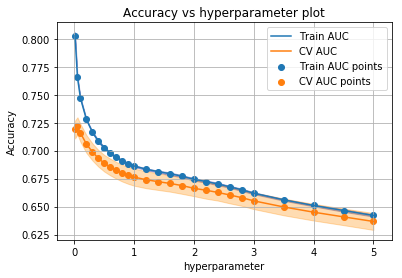

In [106]:
parameters = {'alpha':[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.5,4,4.5,5]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### To find the Best Penalty we are using "l1" Regulrizer on same range of "ALPHA" values

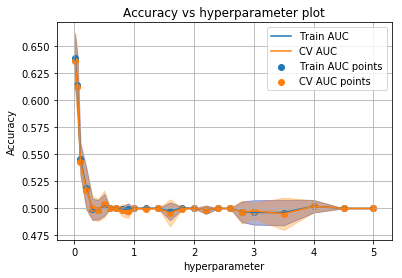

In [107]:
parameters = {'alpha':[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.5,4,4.5,5]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

#### L1 Regularizer performs well on BOW encoded data than L2 regularizer

### Trainng Model Using Best HyperParameter

In [108]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [109]:
# The Hyperpaameter cannot be -VE since we taking the least values as Hyperparameter
best_alpha_1 = 0.01

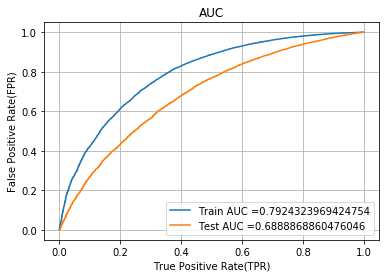

In [110]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
#default alpha = 0.0001
Classifier_bow = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.001)

Classifier_bow.fit(X_train1, y_train)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred = Classifier_bow.decision_function(X_train1)    
y_test_pred = Classifier_bow.decision_function(X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

In [111]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 1.52
[[ 3713  3713]
 [ 4676 36939]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.947


Text(0.5, 1.0, 'Test Confusion Matix')

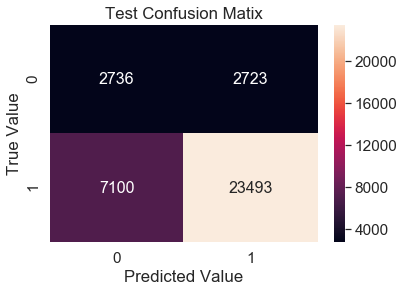

In [113]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

### Test Data

In [114]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.947
[[ 2736  2723]
 [ 7100 23493]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.947


Text(0.5, 1.0, 'Test Confusion Matix')

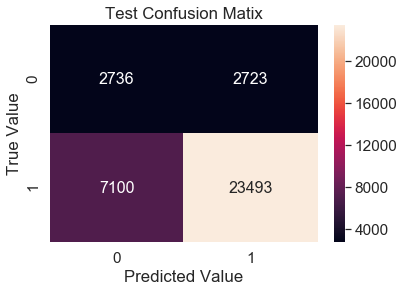

In [115]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.2 Merging all Categorical and Numerical _ SET-2 TF-IDF Encoding

In [116]:
X_train1 = hstack((train_categories_one_hot, train_sub_categories_one_hot, train_state_one_hot, train_grade_one_hot,
                  train_teacher_one_hot,train_text_tfidf, train_title_tfidf, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))



(49041, 14320) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [117]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot,test_text_tfidf, test_title_tfidf, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar,test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1))

(36052, 14320) (36052,)
<class 'scipy.sparse.csr.csr_matrix'>


In [118]:
X_cv1 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot,cv_text_tfidf, cv_title_tfidf, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
                  cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1))

(24155, 14320) (24155,)
<class 'scipy.sparse.csr.csr_matrix'>


### Hyperparameter Tunning

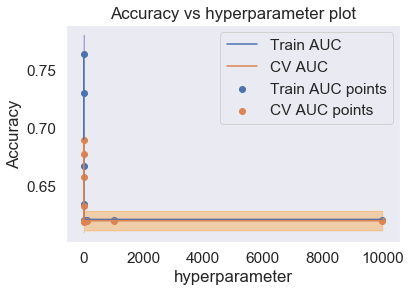

In [120]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### Again for TF-IDF encoding we cant able to find best "ALPHA" from above

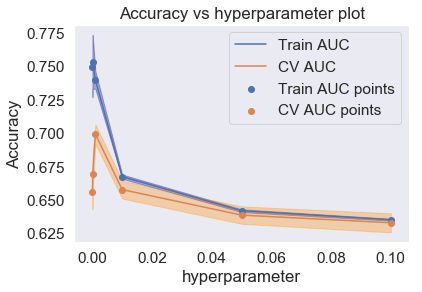

In [121]:
#Reducing the range of alpha for L2 regularizer
parameters = {'alpha':[0.00001, 0.0001, 0.001,0.01, 0.05, 0.1]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### For best Penalty usin L1 Regularization on same range of alpha Values 

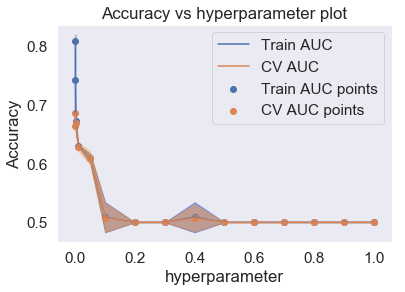

In [123]:
parameters = {'alpha':[0.00001, 0.0001, 0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

#### L1 Regularizer seems to perform well in TF-IDF encoded data. Since AUC curve for L1 regularizer is seems better than L2 reg

### Training Model on best Hyperparameter

In [124]:
best_alpha_2 = 0.001

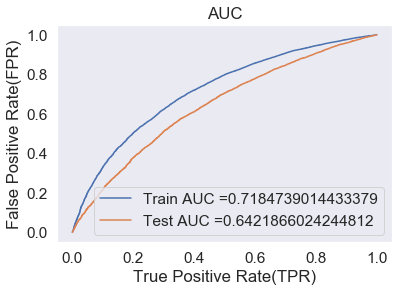

In [127]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

Classifier_tfidf = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.001)

Classifier_tfidf.fit(X_train1, y_train)

y_train_pred = Classifier_tfidf.decision_function(X_train1)    
y_test_pred = Classifier_tfidf.decision_function(X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Train Confusing Matrix

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.998
[[ 3713  3713]
 [ 8454 33161]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.025


Text(0.5, 1.0, 'Test Confusion Matix')

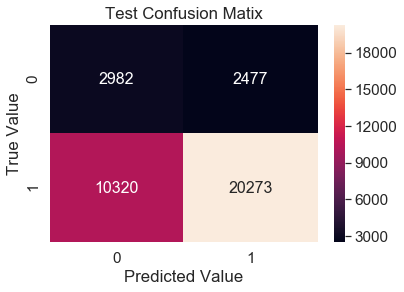

In [129]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

### Test Confusion Matrix

In [130]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.025
[[ 2982  2477]
 [10320 20273]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.025


Text(0.5, 1.0, 'Test Confusion Matix')

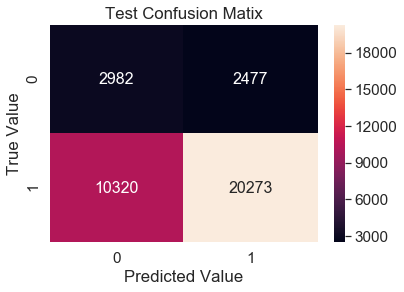

In [131]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.3 Merging all Categorical and Numerical _ SET-3 AVG-W2V Encoding

In [132]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot, train_title_avg_w2v_vectors, train_avg_w2v_vectors, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar, train_title_word_count_standar, train_essay_word_count_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))

(49041, 708) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [133]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_title_avg_w2v_vectors, test_avg_w2v_vectors, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar, test_title_word_count_standar, test_essay_word_count_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1))

(36052, 708) (36052,)
<class 'scipy.sparse.csr.csr_matrix'>


In [134]:
X_cv1 = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_state_one_hot, cv_grade_one_hot,
                  cv_teacher_one_hot, cv_title_avg_w2v_vectors, cv_avg_w2v_vectors, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar, cv_title_word_count_standar, cv_essay_word_count_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1))

(24155, 708) (24155,)
<class 'scipy.sparse.csr.csr_matrix'>


In [136]:
print(X_train1.shape, y_train.shape)

(49041, 708) (49041,)


### Hyperparameter Tunning

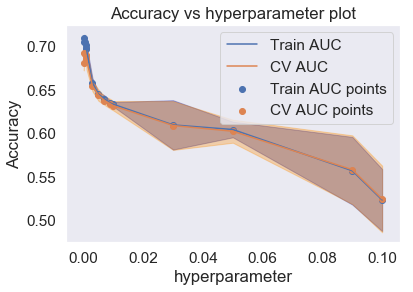

In [138]:
#we are using L1 Regularizer 
parameters = {'alpha':[0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.03, 0.05, 0.09, 0.1]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)un

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### we are using L2 Regularizer as we seen that L1 is Peforms badly

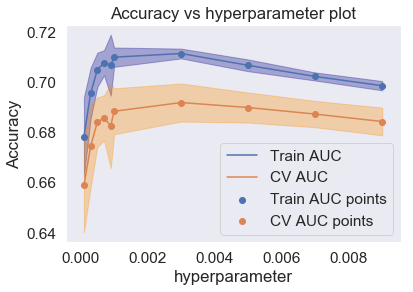

In [140]:
#we are using L2 Regularizer as we know that L1 is Peforms badly
parameters = {'alpha':[0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009]}                        

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']  
train_auc_std= classifier.cv_results_['std_train_score']  
cv_auc = classifier.cv_results_['mean_test_score']  
cv_auc_std= classifier.cv_results_['std_test_score']  

plt.plot(parameters['alpha'], train_auc, label='Train AUC')     
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue') 

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### L2 Regularizer Seems better Auccaracy than L1 Regualrizer

### Training Model Using best Hyperparameter

In [146]:
best_c_3 = 0.002

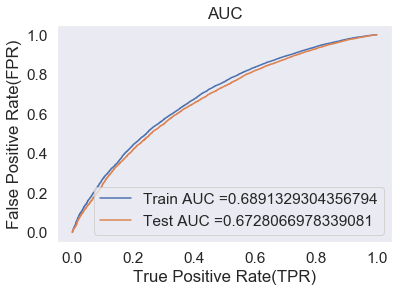

In [145]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

Classifier_avgw2v = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.0001)

Classifier_avgw2v.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = Classifier_avgw2v.decision_function(X_train1)    
y_test_pred = Classifier_avgw2v.decision_function(X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Train Confusion Matrix

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 1.7
[[ 3714  3712]
 [ 9909 31706]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 2.281


Text(0.5, 1.0, 'Test Confusion Matix')

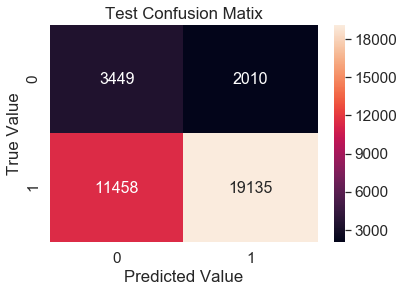

In [148]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

### Test Confusion Matrix

In [149]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 2.281
[[ 3449  2010]
 [11458 19135]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 2.281


Text(0.5, 1.0, 'Test Confusion Matix')

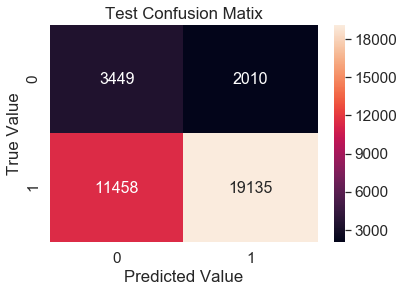

In [150]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.4 Merging all Categorical and Numerical _ SET-4 TFIDF-W2V Encoding

In [206]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                   train_teacher_one_hot, train_title_tfidf_w2v_vectors, train_essay_tfidf_w2v_vectors,
                   train_quantity_standar, train_prev_proj_standar, train_price_standar,train_positive_standar,
                   train_negitive_standar,  train_neutral_standar, train_title_word_count_standar, 
                   train_essay_word_count_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1)) #train_title_tfidf_w2v_vectors train_essay_tfidf_w2v_vectors

(49041, 708) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [208]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_title_tfidf_w2v_vectors, test_essay_tfidf_w2v_vectors,
                  test_quantity_standar, test_prev_proj_standar, test_price_standar, test_positive_standar,
                  test_negitive_standar, test_neutral_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1)) #train_title_tfidf_w2v_vectors train_essay_tfidf_w2v_vectors

(36052, 708) (36052,)
<class 'scipy.sparse.csr.csr_matrix'>


In [209]:
X_cv1 = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_state_one_hot, cv_grade_one_hot,
                   cv_teacher_one_hot, cv_title_tfidf_w2v_vectors, cv_essay_tfidf_w2v_vectors,
                   cv_quantity_standar, cv_prev_proj_standar, cv_price_standar,cv_positive_standar,
                   cv_negitive_standar, cv_neutral_standar, cv_title_word_count_standar, 
                   cv_essay_word_count_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1)) #train_title_tfidf_w2v_vectors train_essay_tfidf_w2v_vectors

(24155, 708) (24155,)
<class 'scipy.sparse.csr.csr_matrix'>


In [210]:
print(X_train1.shape, y_train.shape)

(49041, 708) (49041,)


### Hyperparameter Tunning

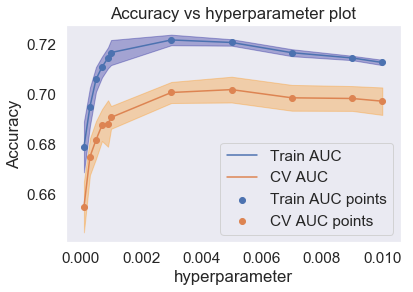

In [161]:
#we are using L2 Regularizer 
parameters = {'alpha':[0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01]}                        

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()                                                                                                                     

### L1 Regularizer

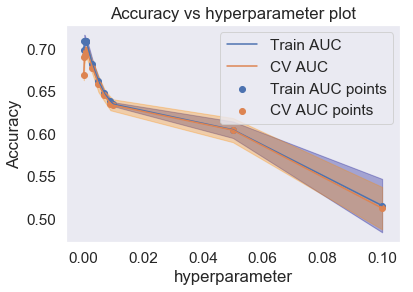

In [162]:
#we are using L2 Regularizer as we know that L1 is Peforms badly
#0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01,
parameters = {'alpha':[0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01,0.05,0.1]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

In [205]:
best_c_4 = 0.007

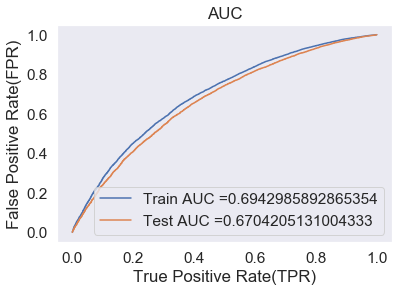

In [211]:
from sklearn.metrics import roc_curve, auc

Classifier_tfidfw2v = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.001)

Classifier_tfidfw2v.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = Classifier_tfidfw2v.decision_function(X_train1)    
y_test_pred = Classifier_tfidfw2v.decision_function(X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")  
plt.ylabel("False Positive Rate(FPR)")  
plt.title("AUC")  
plt.grid()  
plt.show()  

### Train Confusion Matrix

In [212]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 1.13
[[ 3714  3712]
 [ 9751 31864]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.188


Text(0.5, 1.0, 'Test Confusion Matix')

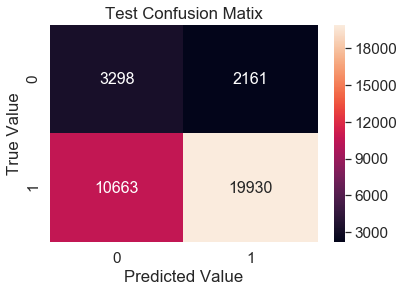

In [213]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

### Test Confusion Matrix

In [214]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.188
[[ 3298  2161]
 [10663 19930]]


the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 1.188


Text(0.5, 1.0, 'Test Confusion Matix')

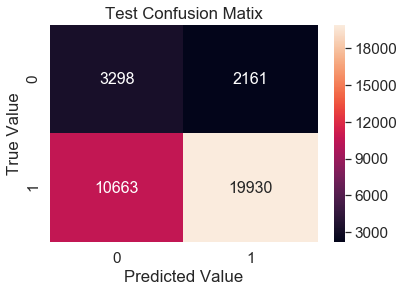

In [215]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

## 2.5 Apply Logistic Regression on Set-5

<b>[Task-2]</b> Apply Logistic Regression on the below feature set Set 5 by finding the best hyper parameter GridSearch </br>
 
<b>Consider these set of features for Set 5 in Assignment:</b>

<b>categorical data</b>school_state 
clean_categories....clean_subcategories....project_grade_category....teacher_prefix

<b>numerical data</b>
quantity....teacher_number_of_previously_posted_projects....price

<b>New Features:-</b>

sentiment score's of each of the essay : numerical data   <br>
number of words in the title : numerical data   <br>
number of words in the combine essays : numerical data  <br>

In [216]:
from scipy.sparse import hstack
X_train1 = hstack((train_categories_one_hot, train_sub_categories_one_hot, train_grade_one_hot,
                   train_teacher_one_hot, train_quantity_standar, train_prev_proj_standar, train_price_standar, 
                   train_title_word_count_standar, train_essay_word_count_standar, train_positive_standar,
                   train_negitive_standar, train_neutral_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))

(49041, 57) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [217]:

X_test1 = hstack((test_categories_one_hot, test_sub_categories_one_hot, test_grade_one_hot,
                   test_teacher_one_hot, test_quantity_standar, test_prev_proj_standar, test_price_standar, 
                   test_title_word_count_standar, test_essay_word_count_standar, test_positive_standar,
                   test_negitive_standar, test_neutral_standar)).tocsr()
print(X_test1.shape, y_train.shape)
print(type(X_test1))

(36052, 57) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [218]:

X_cv1 = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_grade_one_hot,
                   cv_teacher_one_hot, cv_quantity_standar, cv_prev_proj_standar, cv_price_standar, 
                   cv_title_word_count_standar, cv_essay_word_count_standar, cv_positive_standar,
                   cv_negitive_standar, cv_neutral_standar)).tocsr()
print(X_cv1.shape, y_train.shape)
print(type(X_cv1))

(24155, 57) (49041,)
<class 'scipy.sparse.csr.csr_matrix'>


In [219]:
y_trainn = y_train[0:24155,]
print(y_trainn.shape)

(24155,)


### Hyperparameter Tunning

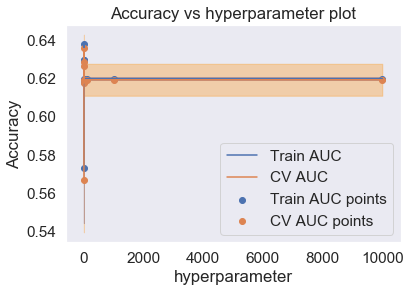

In [174]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### Apply TruncatedSVD on TfidfVectorizer of essay text, choose the number of components (n_components) using Elbow Method on Numerical data

In [175]:
#There are 12132 dimensions here
train_text_tfidf1 = train_text_tfidf[:,0:2999]
print(train_text_tfidf1.shape)
 
test_text_tfidf1 = test_text_tfidf[:,0:2999]
print(test_text_tfidf1.shape)

cv_text_tfidf1 = cv_text_tfidf[:,0:2999]
print(cv_text_tfidf1.shape)

(49041, 2999)
(36052, 2999)
(24155, 2999)


In [176]:
from sklearn.decomposition import TruncatedSVD
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#declaring index as Dimensions in train_text_tfidf
Dim = [50,100,200,500,1500,2000,2500]
Varience_sum = []
for i in tqdm(Dim):
    svd = TruncatedSVD(n_components = i, random_state = 42)
    svd.fit(train_text_tfidf1)
    Varience_sum.append(svd.explained_variance_ratio_.sum())

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [06:48<00:00, 91.81s/it]


In [177]:
Varience_sum

[0.244369911189235,
 0.35369855946049694,
 0.49429668430423596,
 0.7077503386438477,
 0.9250949868117752,
 0.9637410083977517,
 0.9868316170611467]

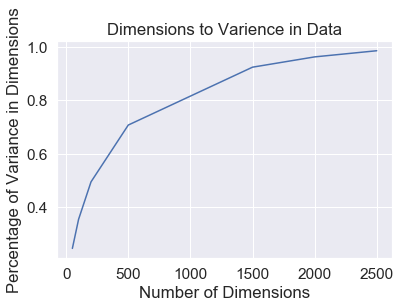

In [178]:

plt.xlabel("Number of Dimensions")
plt.ylabel("Percentage of Variance in Dimensions")
plt.title("Dimensions to Varience in Data")
plt.plot(Dim,Varience_sum)
plt.show()

### At 2000 dimensions we are seeing Accuracy greater than 90% so considering 2000 dim

In [179]:
#Train SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components= 2000, random_state=42)
svd.fit(train_text_tfidf1)
svd_train = svd.transform(train_text_tfidf1)

In [180]:
print("Shape of SVD Train Matrix is ", svd_train.shape)

Shape of SVD Train Matrix is  (49041, 2000)


In [181]:
#Test SVD
svd_test = svd.transform(test_text_tfidf1)
print("Shape of matrix after Decomposition ",svd_test.shape)

Shape of matrix after Decomposition  (36052, 2000)


In [183]:
#CV SVD
svd_cv = svd.transform(test_text_tfidf1)
print("Shape of matrix after Decomposition ",svd_cv.shape)

Shape of matrix after Decomposition  (36052, 2000)


### Grid Search

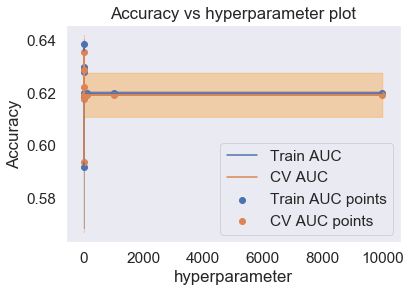

In [186]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

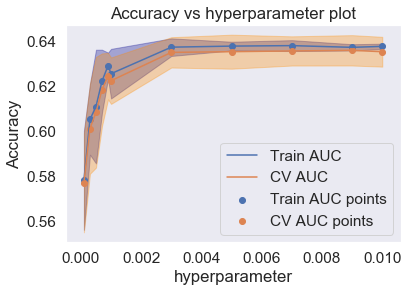

In [220]:
#we are using L2 Regularizer 
parameters = {'alpha':[0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

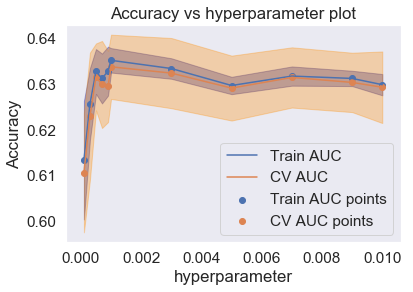

In [221]:
#we are using L2 Regularizer 
parameters = {'alpha':[0.0001,0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.007, 0.009, 0.01]}

SV = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(SV, parameters, cv= 10, scoring='roc_auc')

classifier.fit(X_train1, y_train)

train_auc= classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
#https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs hyperparameter plot")
plt.grid()
plt.show()

### Training Model using Best Hyper Parameter

### Here the Best Hyperparameter Seems to be 0.001

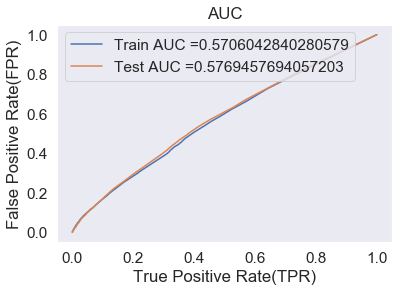

In [223]:
from sklearn.metrics import roc_curve, auc

Classifier_tfidfw2v = SGDClassifier(loss = 'hinge', penalty = 'l1', alpha = 0.001)

Classifier_tfidfw2v.fit(X_train1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = Classifier_tfidfw2v.decision_function(X_train1)    
y_test_pred = Classifier_tfidfw2v.decision_function(X_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")  
plt.ylabel("False Positive Rate(FPR)")  
plt.title("AUC")  
plt.grid()  
plt.show()  

### Train Confusion Matrix

In [224]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24977252893782256 for threshold 0.999
[[ 3825  3601]
 [17208 24407]]


the maximum value of tpr*(1-fpr) 0.24979845259240885 for threshold 1.0


Text(0.5, 1.0, 'Test Confusion Matix')

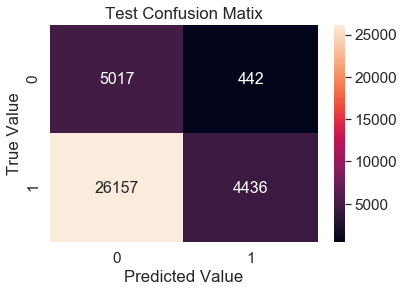

In [225]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

### Test Confusion Matrix

In [226]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24979845259240885 for threshold 1.0
[[ 5017   442]
 [26157  4436]]


the maximum value of tpr*(1-fpr) 0.24979845259240885 for threshold 1.0


Text(0.5, 1.0, 'Test Confusion Matix')

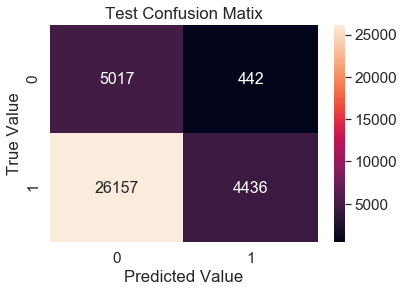

In [227]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds,
                                                                      test_fpr,test_fpr)), range(2),range(2))
sea.set(font_scale=1.4)
sea.heatmap(train_confusion_matrix, annot = True, annot_kws={"size":16}, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Test Confusion Matix")

<h1>3. Conclusion</h1>

In [228]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
TB = PrettyTable()
TB.field_names = ["Vectorizer", "C:Hyperparameter", "Regularizer", "Train_AUC", "Test_Auc"]
TB.title = "Support Vector Regression"
TB.add_row(["BOW-Model", 0.01, "L2", 0.78,0.68])
TB.add_row(["TFIDF-Model", 0.001, "L2", 0.77, 0.69])
TB.add_row(["AvgW2v-Model", 0.002,"L2", 0.69, 0.68])
TB.add_row(["Tf-Idf-Model", 0.007, "L2", 0.68, 0.67])
TB.add_row(["NUM_Features-Model",0.007,"L1", 0.62, 0.61])
print(TB)

+--------------------+------------------+-------------+-----------+----------+
|     Vectorizer     | C:Hyperparameter | Regularizer | Train_AUC | Test_Auc |
+--------------------+------------------+-------------+-----------+----------+
|     BOW-Model      |       0.01       |      L2     |    0.78   |   0.68   |
|    TFIDF-Model     |      0.001       |      L2     |    0.77   |   0.69   |
|    AvgW2v-Model    |      0.002       |      L2     |    0.69   |   0.68   |
|    Tf-Idf-Model    |      0.007       |      L2     |    0.68   |   0.67   |
| NUM_Features-Model |      0.007       |      L1     |    0.62   |   0.61   |
+--------------------+------------------+-------------+-----------+----------+


### Observations:

As we have used all BOW, TF-IDF, AVG-W2V, TF-IDF weighted W2V encoding and in any of the encoding technique we didn't find best model which gives maximum accuracy. But from above models AvgW2v and tf-idf weighted w2v is performing best. 